In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression


In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
# Read the CSV file into a DataFrame
nba = pd.read_csv('nbafinal.csv')

In [4]:
nba.shape

(30, 28)

In [5]:
nba.head()

,Team,Games Played,Wins,Losses,WIN%,Minutes Played,Points Scored,Field Goals Made,Field Goals Attempted,FG%,Three Point Made,Three Point Attempted,3P%,Free Throws Made,Free Throws Attempted,FT%,Offensive Rebounds,Defensive Rebounds,Total Rebounds,Assits,Turnovers,Steals,Blocks,Block Againsts,Personal Fouls,Personal Fouls Drawn,Points Against,+/-
0,Atlanta Hawks,459,217,242,47.276688,22192,53153,19446,41549,46.802570,5750,16009,35.917297,8511,10625,80.103529,5070,15313,20383,11771,6332,3534,2185,2395,8948,9127,52642,-511
1,Boston Celtics,464,311,153,67.025862,22482,53663,19444,41350,47.022975,6958,18697,37.214526,7817,9746,80.207265,4892,16231,21123,11699,6071,3361,2646,1996,8613,8776,50367,3296
2,Brooklyn Nets,465,228,237,49.032258,22455,52071,19011,40785,46.612725,6047,16671,36.272569,8002,10215,78.335781,4695,15631,20326,11826,6566,3255,2413,2263,9341,8931,51743,-328
3,Charlotte Hornets,457,165,292,36.105033,22076,49671,18317,40594,45.122432,5759,16348,35.227551,7278,9562,76.113784,4954,14940,19894,11685,6538,3463,2152,2323,8687,8732,47174,-2497
4,Chicago Bulls,457,211,246,46.170678,22101,51232,19151,40539,47.240928,5519,15227,36.244828,7411,9315,79.559850,4429,15428,19857,11596,6326,3560,2017,2335,8732,8326,50750,-482


In [11]:
nba.tail()

,Team,Games Played,Wins,Losses,WIN%,Minutes Played,Points Scored,Field Goals Made,Field Goals Attempted,FG%,Three Point Made,Three Point Attempted,3P%,Free Throws Made,Free Throws Attempted,FT%,Offensive Rebounds,Defensive Rebounds,Total Rebounds,Assits,Turnovers,Steals,Blocks,Block Againsts,Personal Fouls,Personal Fouls Drawn,Points Against,+/-
25,Sacramento Kings,464,222,242,47.844828,22442,53190,19641,41325,47.528131,5960,16536,36.042574,7948,10306,77.120124,4633,15296,19929,12025,6346,3457,1969,2069,9199,9009,52694,-496
26,San Antonio Spurs,463,174,289,37.580994,22399,52284,19621,42153,46.547102,5390,15248,35.348898,7652,9869,77.535718,4849,15641,20490,12622,6276,3415,2426,2214,8434,8604,50539,-1745
27,Toronto Raptors,465,222,243,47.741935,22455,51865,19094,41831,45.645574,5705,16144,35.338206,7972,10274,77.593926,5333,15066,20399,11787,6302,3989,2261,2510,9442,8917,51737,-128
28,Utah Jazz,465,229,236,49.247312,22430,53164,19125,40878,46.785557,6550,17970,36.449638,8364,10607,78.853587,5164,16239,21403,11434,7119,3030,2287,2374,8975,9242,52948,216
29,Washington Wizards,464,160,304,34.482759,22377,52199,19334,41438,46.657657,5371,15360,34.967448,8160,10486,77.818043,4491,15523,20014,11937,6599,3380,2240,2341,9375,9260,49694,-2505


In [13]:
print(nba.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Team                   30 non-null     object 
 1   Games Played           30 non-null     int64  
 2   Wins                   30 non-null     int64  
 3   Losses                 30 non-null     int64  
 4   WIN%                   30 non-null     float64
 5   Minutes Played         30 non-null     int64  
 6   Points Scored          30 non-null     int64  
 7   Field Goals Made       30 non-null     int64  
 8   Field Goals Attempted  30 non-null     int64  
 9   FG%                    30 non-null     float64
 10  Three Point Made       30 non-null     int64  
 11  Three Point Attempted  30 non-null     int64  
 12  3P%                    30 non-null     float64
 13  Free Throws Made       30 non-null     int64  
 14  Free Throws Attempted  30 non-null     int64  
 15  FT%     

In [15]:
# Data Wrangling

# Check for missing values
print("Missing Values:\n", nba.isnull().sum())

# Drop rows with missing values (if any)
df = nba.dropna()

# Convert categorical variables to numerical (for team names)
team_mapping = {team: i for i, team in enumerate(nba['Team'].unique())}
nba['Team_Num'] = nba['Team'].map(team_mapping)

Missing Values:
 Team                     0
Games Played             0
Wins                     0
Losses                   0
WIN%                     0
Minutes Played           0
Points Scored            0
Field Goals Made         0
Field Goals Attempted    0
FG%                      0
Three Point Made         0
Three Point Attempted    0
3P%                      0
Free Throws Made         0
Free Throws Attempted    0
FT%                      0
Offensive Rebounds       0
Defensive Rebounds       0
Total Rebounds           0
Assits                   0
Turnovers                0
Steals                   0
Blocks                   0
Block Againsts           0
Personal Fouls           0
Personal Fouls Drawn     0
Points Against           0
+/-                      0
dtype: int64


In [17]:
# Calculate shooting efficiency metrics
nba['FG_PCT_DIFF'] = nba['FG%'] - (nba['Points Against'] / nba['Field Goals Attempted'])
nba['3P_PCT_DIFF'] = nba['3P%'] - (nba['Points Against'] / nba['Three Point Attempted'])
nba['FT_PCT_DIFF'] = nba['FT%'] - (nba['Points Against'] / nba['Free Throws Attempted'])


In [19]:
# Calculate rebounding, turnover, steals and blocks differentials
nba['REB_DIFF'] = nba['Total Rebounds'] - (nba['Points Against'] / nba['Total Rebounds'])
nba['TOV_DIFF'] = nba['Turnovers'] - (nba['Points Against'] / nba['Turnovers'])
nba['STEAL'] = nba['Steals'] - (nba['Points Against'] / nba['Steals'])
nba['BLOCKS'] = nba['Blocks'] - (nba['Points Against'] / nba['Blocks'])
nba['BLKS_AGNST'] = nba['Block Againsts'] - (nba['Points Against'] / nba['Block Againsts'])

# Calculate point differentials
nba['PTS_DIFF'] = nba['Points Scored'] - nba['Points Against']

In [21]:
# Exploratory Data Analysis (EDA)

# Summary statistics

print("\nSummary Statistics:\n", nba.describe())



Summary Statistics:
        Games Played        Wins      Losses       WIN%  Minutes Played  \
count     30.000000   30.000000   30.000000  30.000000       30.000000   
mean     463.066667  231.533333  231.533333  49.983079    22365.533333   
std        3.443468   42.518745   41.631166   9.079645      159.866913   
min      457.000000  136.000000  153.000000  29.629630    22041.000000   
25%      460.000000  209.500000  205.250000  45.252347    22235.750000   
50%      464.500000  229.000000  232.000000  49.678361    22425.000000   
75%      465.000000  261.500000  253.500000  55.965674    22459.500000   
max      468.000000  311.000000  323.000000  67.025862    22584.000000   

       Points Scored  Field Goals Made  Field Goals Attempted        FG%  \
count      30.000000         30.000000              30.000000  30.000000   
mean    52278.100000      19183.966667           41031.900000  46.753723   
std      1199.766482        518.126964             706.277925   0.971493   
min    

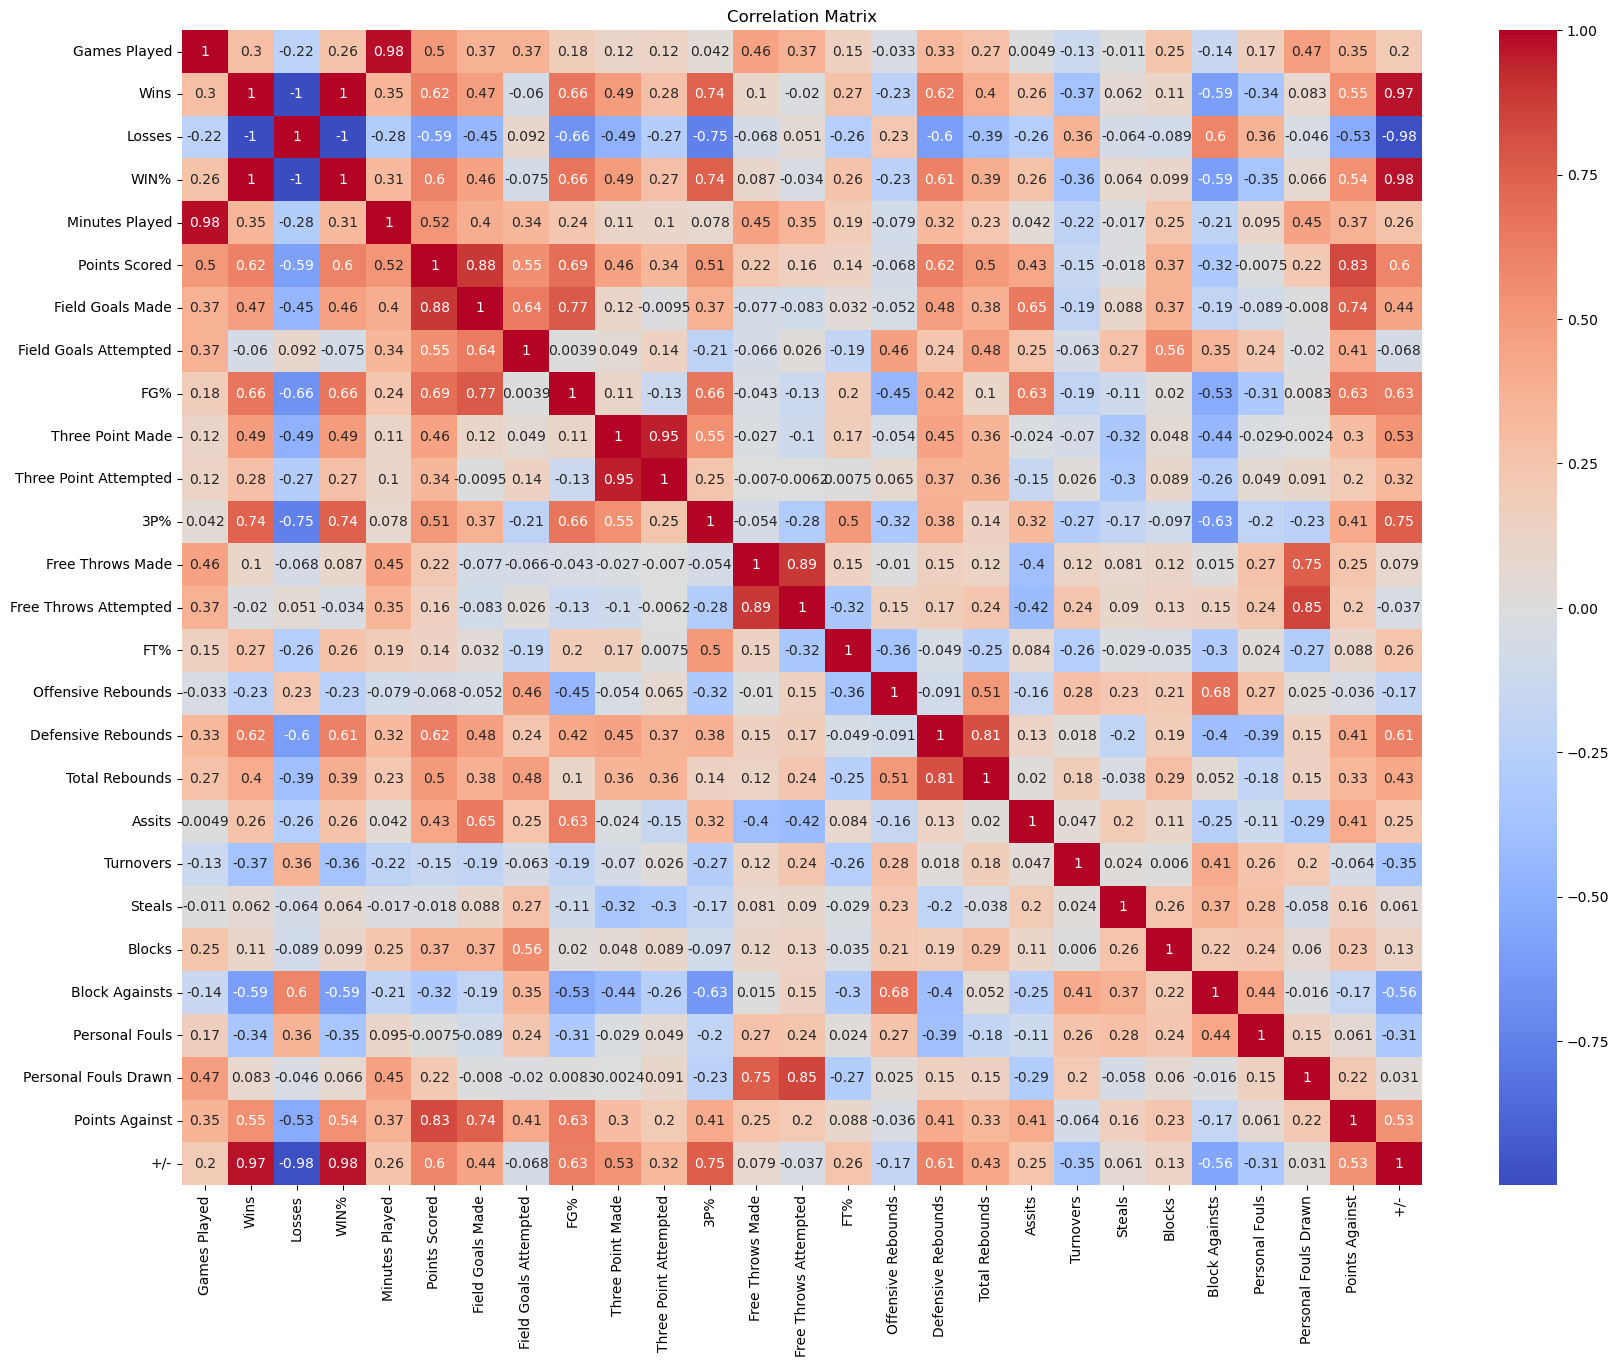

In [23]:
# Identify numeric columns
numeric_df = df.select_dtypes(include=np.number)

# Correlation matrix
corr_matrix = numeric_df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [24]:
# Hypothesis Analysis
# Focus on Charlotte Hornets
charlotte_nba = nba[nba['Team'] == 'Charlotte Hornets']
print("\nCharlotte Hornets Statistics:\n", charlotte_nba.describe())


Charlotte Hornets Statistics:
        Games Played   Wins  Losses       WIN%  Minutes Played  Points Scored  \
count           1.0    1.0     1.0   1.000000             1.0            1.0   
mean          457.0  165.0   292.0  36.105033         22076.0        49671.0   
std             NaN    NaN     NaN        NaN             NaN            NaN   
min           457.0  165.0   292.0  36.105033         22076.0        49671.0   
25%           457.0  165.0   292.0  36.105033         22076.0        49671.0   
50%           457.0  165.0   292.0  36.105033         22076.0        49671.0   
75%           457.0  165.0   292.0  36.105033         22076.0        49671.0   
max           457.0  165.0   292.0  36.105033         22076.0        49671.0   

       Field Goals Made  Field Goals Attempted        FG%  Three Point Made  \
count               1.0                    1.0   1.000000               1.0   
mean            18317.0                40594.0  45.122432            5759.0   
std       

In [25]:
# Compare Charlotte with the league average
# Select numeric columns
numeric_df = df.select_dtypes(include=np.number)

In [29]:
# Compare Charlotte with the league average
# Calculate league average for numeric columns only
league_avg = numeric_df.mean()
print("\nLeague Average Statistics:\n", league_avg)


League Average Statistics:
 Games Played               463.066667
Wins                       231.533333
Losses                     231.533333
WIN%                        49.983079
Minutes Played           22365.533333
Points Scored            52278.100000
Field Goals Made         19183.966667
Field Goals Attempted    41031.900000
FG%                         46.753723
Three Point Made          5867.333333
Three Point Attempted    16264.233333
3P%                         36.060963
Free Throws Made          8042.833333
Free Throws Attempted    10327.766667
FT%                         77.899845
Offensive Rebounds        4814.533333
Defensive Rebounds       15599.400000
Total Rebounds           20413.933333
Assits                   11768.866667
Turnovers                 6489.966667
Steals                    3533.533333
Blocks                    2252.733333
Block Againsts            2252.733333
Personal Fouls            9032.433333
Personal Fouls Drawn      9032.333333
Points Against       

In [31]:
# Compare Charlotte's key metrics with league average
print("\nCharlotte vs. League Average Comparison:")
print("Wins (W): Charlotte =", charlotte_nba['Wins'].mean(), ", League =", league_avg['Wins'])
print("Point Differential (PTS_DIFF): Charlotte =", charlotte_nba['+/-'].mean(), ", League =", league_avg['+/-'])
print("FG Percentage Differential (FG%): Charlotte =", charlotte_nba['FG%'].mean(), ", League =", league_avg['FG%'])
print("3P Percentage Differential (3P%): Charlotte =", charlotte_nba['3P%'].mean(), ", League =", league_avg['3P%'])
print("Rebound Differential (Total Rebounds): Charlotte =", charlotte_nba['Total Rebounds'].mean(), ", League =", league_avg['Total Rebounds'])
print("Turnover Differential (TOV_DIFF): Charlotte =", charlotte_nba['Turnovers'].mean(), ", League =", league_avg['Turnovers'])
print("Steals Differential (STEAL_DIFF): Charlotte =", charlotte_nba['Steals'].mean(), ", League =", league_avg['Steals'])
print("Blocks Differential (BLOCK_DIFF): Charlotte =", charlotte_nba['Blocks'].mean(), ", League =", league_avg['Blocks'])




Charlotte vs. League Average Comparison:
Wins (W): Charlotte = 165.0 , League = 231.53333333333333
Point Differential (PTS_DIFF): Charlotte = -2497.0 , League = 0.0
FG Percentage Differential (FG%): Charlotte = 45.12243189 , League = 46.753722673999995
3P Percentage Differential (3P%): Charlotte = 35.22755077 , League = 36.060962703
Rebound Differential (Total Rebounds): Charlotte = 19894.0 , League = 20413.933333333334
Turnover Differential (TOV_DIFF): Charlotte = 6538.0 , League = 6489.966666666666
Steals Differential (STEAL_DIFF): Charlotte = 3463.0 , League = 3533.5333333333333
Blocks Differential (BLOCK_DIFF): Charlotte = 2152.0 , League = 2252.733333333333


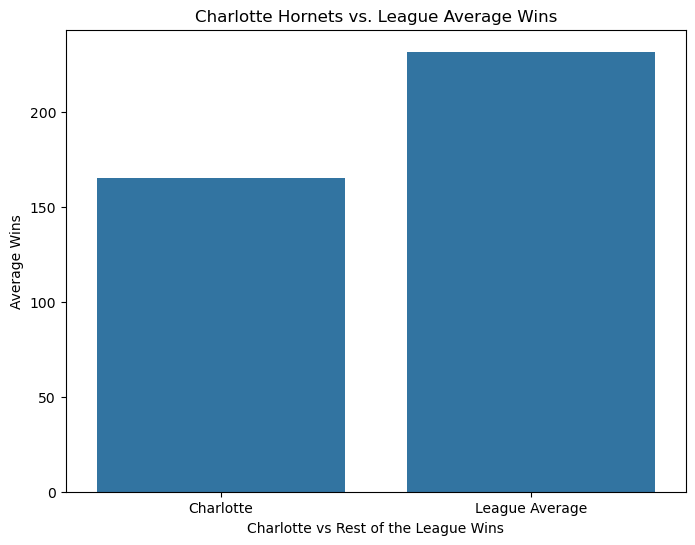

In [33]:
# Create the bar chart
# Calculate average wins for Charlotte
charlotte_wins = nba[nba['Team'] == 'Charlotte Hornets']['Wins'].mean()

# Calculate average wins for the league
league_wins = nba['Wins'].mean()

# Prepare data for plotting
wins_comparison = pd.DataFrame({
    'Category': ['Charlotte', 'League Average'],
    'Wins': [charlotte_wins, league_wins]
})
plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Wins', data=wins_comparison)
plt.title('Charlotte Hornets vs. League Average Wins')
plt.ylabel('Average Wins')
plt.xlabel('Charlotte vs Rest of the League Wins')
plt.show()

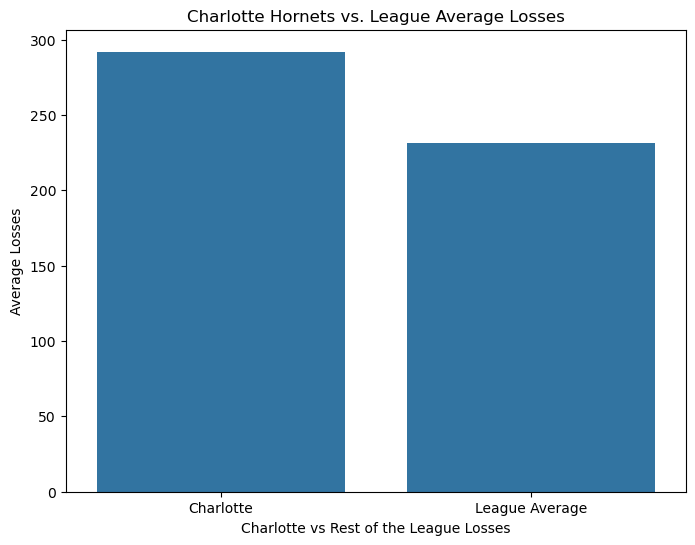

In [35]:
# Create the bar chart
# Calculate average wins for Charlotte
charlotte_losses = nba[nba['Team'] == 'Charlotte Hornets']['Losses'].mean()

# Calculate average wins for the league
league_losses = nba['Losses'].mean()

# Prepare data for plotting
losses_comparison = pd.DataFrame({
    'Category': ['Charlotte', 'League Average'],
    'Losses': [charlotte_losses, league_losses]
})
plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Losses', data=losses_comparison)
plt.title('Charlotte Hornets vs. League Average Losses')
plt.ylabel('Average Losses')
plt.xlabel('Charlotte vs Rest of the League Losses')
plt.show()

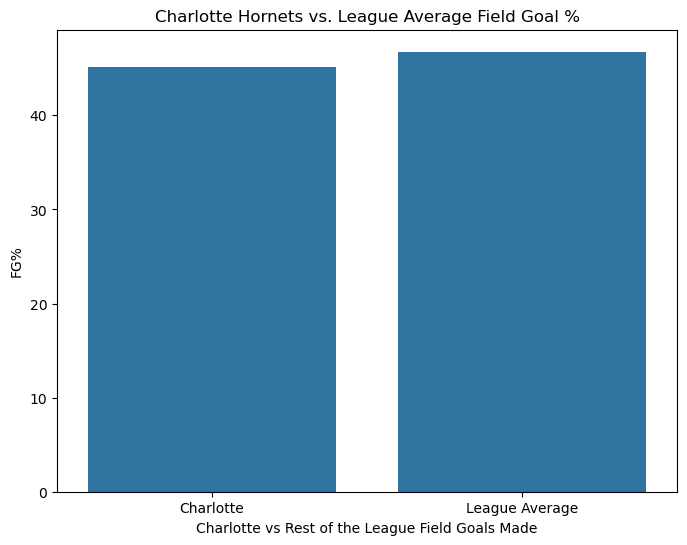

In [37]:
# Create the bar chart
# Calculate average Field goal percentage for Charlotte
charlotte_fg = nba[nba['Team'] == 'Charlotte Hornets']['FG%'].mean()

# Calculate average wins for the league
league_fg = nba['FG%'].mean()

# Prepare data for plotting
FG_comparison = pd.DataFrame({
    'Category': ['Charlotte', 'League Average'],
    'FG%': [charlotte_fg, league_fg]
})
plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='FG%', data=FG_comparison)
plt.title('Charlotte Hornets vs. League Average Field Goal %')
plt.ylabel('FG%')
plt.xlabel('Charlotte vs Rest of the League Field Goals Made')
plt.show()

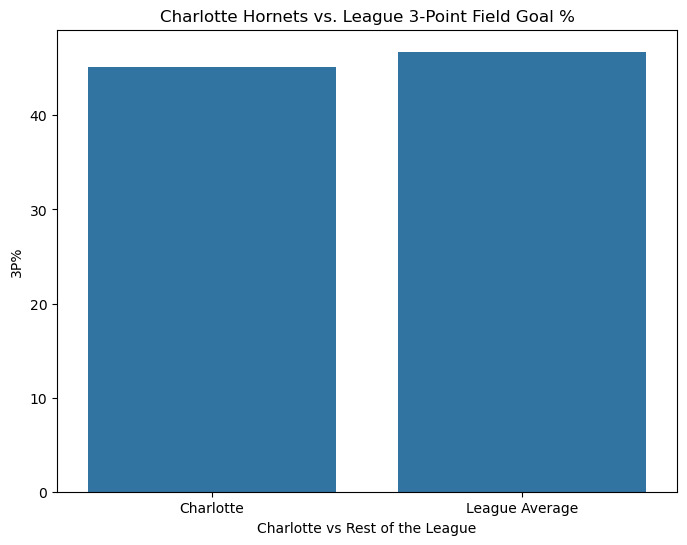

In [39]:
# Create the bar chart
# Calculate average Field goal percentage for Charlotte
charlotte_tpt = nba[nba['Team'] == 'Charlotte Hornets']['3P%'].mean()

# Calculate average wins for the league
league_tpt = nba['3P%'].mean()

# Prepare data for plotting
tpt_comparison = pd.DataFrame({
    'Category': ['Charlotte', 'League Average'],
    '3P%': [charlotte_fg, league_fg]
})
plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='3P%', data=tpt_comparison)
plt.title('Charlotte Hornets vs. League 3-Point Field Goal %')
plt.ylabel('3P%')
plt.xlabel('Charlotte vs Rest of the League')
plt.show()

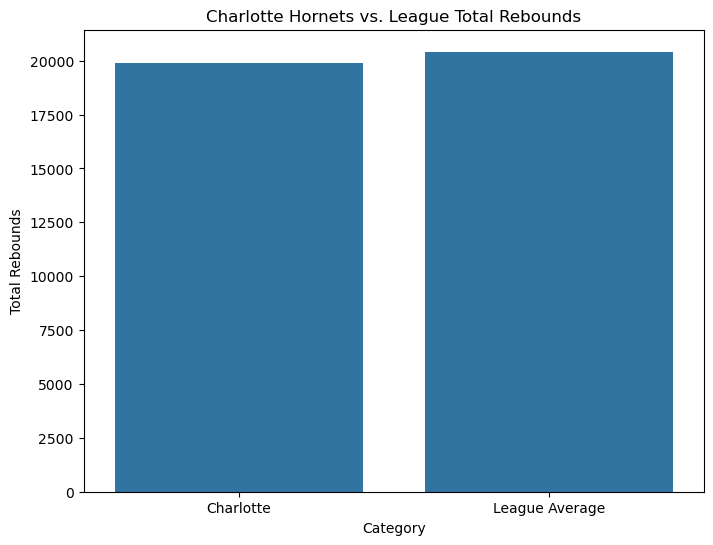

In [41]:
# Create the bar chart
# Calculate average Field goal percentage for Charlotte
charlotte_reb = nba[nba['Team'] == 'Charlotte Hornets']['Total Rebounds'].mean()

# Calculate average wins for the league
league_reb = nba['Total Rebounds'].mean()

# Prepare data for plotting
reb_comparison = pd.DataFrame({
    'Category': ['Charlotte', 'League Average'],
    'Total Rebounds': [charlotte_reb, league_reb]
})
plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Total Rebounds', data=reb_comparison)
plt.title('Charlotte Hornets vs. League Total Rebounds')
plt.ylabel('Total Rebounds')
plt.xlabel('Category')
plt.show()

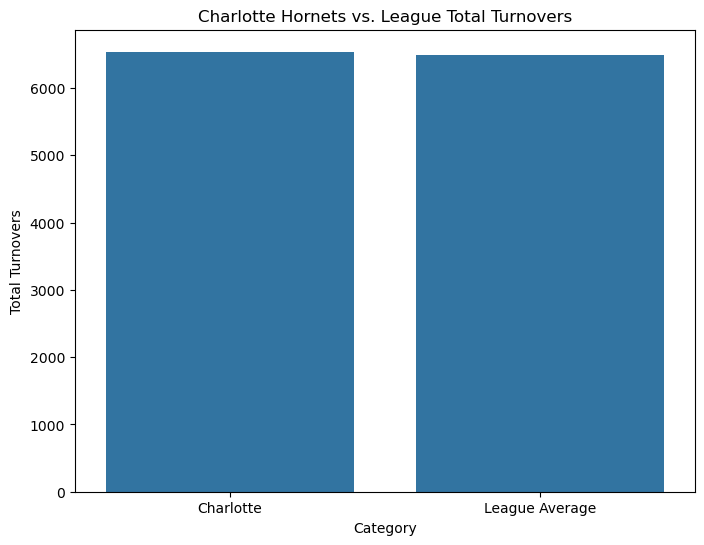

In [43]:
# Create the bar chart
# Calculate average Field goal percentage for Charlotte
charlotte_turn = nba[nba['Team'] == 'Charlotte Hornets']['Turnovers'].mean()

# Calculate average wins for the league
league_turn = nba['Turnovers'].mean()

# Prepare data for plotting
turn_comparison = pd.DataFrame({
    'Category': ['Charlotte', 'League Average'],
    'Total Turnovers': [charlotte_turn, league_turn]
})
plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Total Turnovers', data=turn_comparison)
plt.title('Charlotte Hornets vs. League Total Turnovers')
plt.ylabel('Total Turnovers')
plt.xlabel('Category')
plt.show()

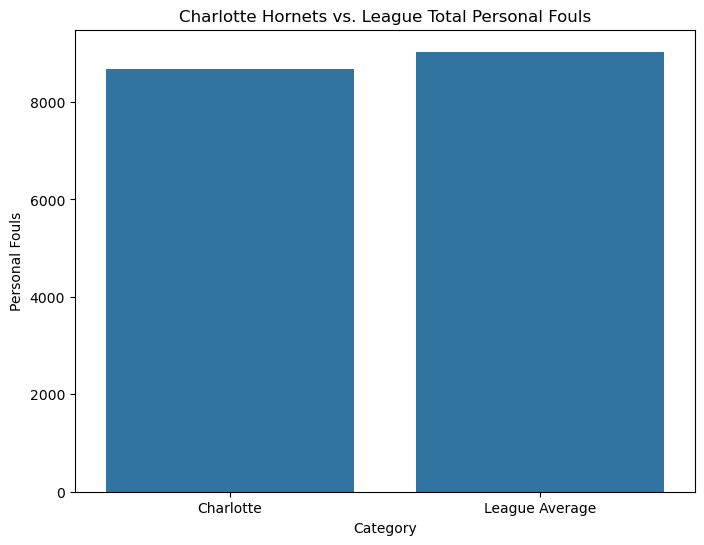

In [45]:
# Create the bar chart
# Calculate average Field goal percentage for Charlotte
charlotte_foul = nba[nba['Team'] == 'Charlotte Hornets']['Personal Fouls'].mean()

# Calculate average wins for the league
league_foul = nba['Personal Fouls'].mean()

# Prepare data for plotting
foul_comparison = pd.DataFrame({
    'Category': ['Charlotte', 'League Average'],
    'Personal Fouls': [charlotte_foul, league_foul]
})
plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Personal Fouls', data=foul_comparison)
plt.title('Charlotte Hornets vs. League Total Personal Fouls')
plt.ylabel('Personal Fouls')
plt.xlabel('Category')
plt.show()

In [47]:
# Linear Regression Model
# Prepare the data
X = nba[['PTS_DIFF', 'FG_PCT_DIFF', '3P_PCT_DIFF', 'REB_DIFF', 'TOV_DIFF', 'BLOCKS', 'BLKS_AGNST', 'STEAL']]
y = nba['Wins']

In [49]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_test.shape

(6, 8)

In [51]:
# Fit and score model on training data

lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.8177059067656031

In [53]:
# Score model on test data

lr.score(X_test, y_test)

0.8901056219653968

In [55]:
# Find coefficients

lr_coef_df = pd.DataFrame({'feature': X.columns, 'coefficient': lr.coef_})
lr_coef_df

,feature,coefficient
0,PTS_DIFF,-0.007296
1,FG_PCT_DIFF,8.981789
2,3P_PCT_DIFF,17.899700
3,REB_DIFF,0.026643
4,TOV_DIFF,-0.022609
5,BLOCKS,0.019917
6,BLKS_AGNST,-0.070300
7,STEAL,0.049922


In [57]:
# Analysis of Charlotte Hornets' Performance:

# From the EDA and hypothesis analysis, we can infer the following:
# 1. Low Point Differential: The Charlotte Hornets have a significantly lower point differential compared to the league average, indicating they are being outscored by their opponents.
# 2. Shooting Inefficiency: Their field goal percentage differential and three-point percentage differential are also lower than the league average, suggesting they are less efficient in shooting.
# 3. Rebounding and Turnover Issues: Charlotte also struggles with rebounding and has a negative turnover differential, meaning they are being outrebounded and committing more turnovers.
# 4. Impact on Wins: The linear regression model and correlation matrix show a strong positive correlation between point differential and wins. The Hornets' low point differential directly contributes to their fewer wins.
# 5. Regression Model Insight: The Regression model confirms that the point differential, and shooting percentages are the strongest predictors of wins in the NBA.

# Conclusion:
# The Charlotte Hornets' low win count can be attributed to their poor offensive and defensive performance, reflected in their low point differential, shooting inefficiencies, and rebounding/turnover issues. To improve their win rate, they need to focus on improving their shooting efficiency, reducing turnovers, and enhancing their rebounding.